#**Session 3: KNN, another supervised learning algorithm**


In [1]:
import keras
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np
from collections import defaultdict
import math  
%matplotlib inline

Aujourd'hui, nous allons voir un différent type de supervised learning: KNN et K-MEAN.

Ils seront appliqués au jeu de données CIFAR 10, jeu de données de 50 000 images appartenant à 10 classes d'images différentes, que nous allons observer.

In [2]:
# Charge le jeu de données
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Observons les dimensions du jeu de données
print("Images du jeu d'entrainement {}".format(x_train.shape));
print("Classes du jeu d'entrainement {}".format(y_train.shape));

# Classes des images de CIFAR-10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 3s 0us/step
Images du jeu d'entrainement (50000, 32, 32, 3)
Classes du jeu d'entrainement (50000, 1)


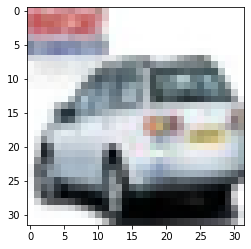

Qui appartient à la classe 1 (car)


In [3]:
# Visualisons un exemple et sa classe
img_index = np.random.randint(0, x_train.shape[0])
plt.imshow(x_train[img_index])
plt.show()

class_indx = y_train[img_index, 0]
print("Qui appartient à la classe {} ({})".format(class_indx, classes[class_indx]))

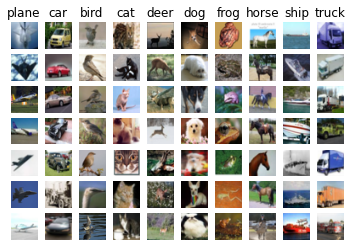

In [4]:
# Grille d'exemples pour chaque classe

num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    # Sélectionne aléatoirement des exemples de la classe y
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)

    # Affiche ces exemples en colonne
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

K-NN (K Nearest Neighbor ou méthode des K plus proches voisins) est un algorithme consistant à trouver, dans le jeu de données d'entrainement, les K images ressemblant le plus à l'image dont nous souhaitons trouver la classe. Pour calculer la ressemblance entre deux images on peut en première approximation considérer simplement leur distance euclidienne (norme L2). Sur les K images trouvées, nous regardons ensuite quelle classe est la plus présente. On pourra ainsi décider de la classe de notre image de test.


In [5]:
# Redimensionne les images en les applatissant afin de faciliter
# leur manipulation
# On veut les shapes suivantes:

# x_train: (50000, 32 * 32 * 3)
# x_test: (10000, 32 * 32 * 3)
# y_train: (Nombre de samples d'entraînement, )
# y_test:  (Nombre de samples de test, )
x_train = x_train.reshape(50000,32*32*3)
x_test = x_test.reshape(10000,32*32*3)
y_train = y_train[:, 0]
# Equivalent à
y_train = np.reshape(y_train, (50_000,))
y_test = y_test[:, 0]

In [6]:
k = 20

De plus, utiliser les 50 000 images d'entraînement pour classer les 10 000 images de test serait *long*. Nous allons donc sélectionner une partie des deux ensembles:

In [7]:
nb_imgs_train = 5000
nb_imgs_test = 1000

Cependant le code au dessus n'est pas très beau et le réimplémenter est un peu pénible.
Afin de simplifier la vie de tout le monde, nous allons utiliser une bibliothèque du nom de **sickit learn**.
Cette bibliothèque est une boite à outils remplie de beaucoup de fonctions très pratiques et d'algorithmes d'apprentissages prêts à l'utilisation. On vous laisse chercher [ici](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) comment l'utiliser. 
**Nous vous déconseillons de faire l'entrainement sur les 50 000 éléments de x_train et le test sur les 10 000 éléments de x_test car cela vous prendrait trop de temps pour tester...**

In [8]:
# --- Méthode brute ---
predictions = np.empty((nb_imgs_test, ))
for id_img_test, img_test in enumerate(x_test[:nb_imgs_test]):
  # Le tableau k_nearest contient les classes des k images les plus proches
  # distances contient les distances entre l'image test et les k plus proches
  k_nearest, distances = np.full((k, ), -1), np.full((k, ), float("+inf"))

  # On cherche à remplir le tableau k_nearest avec les classes des k
  # images d'entraînement les "plus proches" au sens de la distance euclidienne.
  for id_img_train, img_train in enumerate(x_train[:nb_imgs_train]): 
    dist = np.linalg.norm(img_test - img_train)
    furthest_of_nearest = np.argmax(distances)
    if dist < distances[furthest_of_nearest]:
      distances[furthest_of_nearest] = dist
      k_nearest[furthest_of_nearest] = y_train[id_img_train]
  
  predictions[id_img_test] = np.argmax(np.bincount(k_nearest))
  
  print("Classified image {}/{} ".format(id_img_test + 1, nb_imgs_test))

Classified image 1/1000 
Classified image 2/1000 
Classified image 3/1000 
Classified image 4/1000 
Classified image 5/1000 
Classified image 6/1000 
Classified image 7/1000 
Classified image 8/1000 
Classified image 9/1000 
Classified image 10/1000 
Classified image 11/1000 
Classified image 12/1000 
Classified image 13/1000 
Classified image 14/1000 
Classified image 15/1000 
Classified image 16/1000 
Classified image 17/1000 
Classified image 18/1000 
Classified image 19/1000 
Classified image 20/1000 
Classified image 21/1000 
Classified image 22/1000 
Classified image 23/1000 
Classified image 24/1000 
Classified image 25/1000 
Classified image 26/1000 
Classified image 27/1000 
Classified image 28/1000 
Classified image 29/1000 
Classified image 30/1000 
Classified image 31/1000 
Classified image 32/1000 
Classified image 33/1000 
Classified image 34/1000 
Classified image 35/1000 
Classified image 36/1000 
Classified image 37/1000 
Classified image 38/1000 
Classified image 39/1

In [9]:
predictions

array([2., 8., 8., 8., 6., 6., 0., 0., 2., 8., 0., 1., 0., 0., 2., 6., 9.,
       4., 0., 6., 2., 0., 2., 2., 4., 3., 3., 0., 1., 0., 0., 6., 6., 3.,
       2., 0., 0., 8., 2., 6., 0., 0., 2., 4., 0., 0., 2., 0., 6., 6., 0.,
       0., 6., 2., 8., 0., 9., 0., 2., 4., 4., 7., 0., 1., 0., 2., 8., 0.,
       0., 2., 4., 4., 8., 4., 8., 4., 2., 6., 0., 8., 8., 0., 2., 2., 2.,
       0., 2., 0., 8., 6., 0., 2., 8., 0., 2., 2., 6., 2., 0., 9., 2., 4.,
       0., 9., 4., 0., 2., 0., 6., 8., 6., 4., 4., 2., 0., 0., 0., 0., 0.,
       7., 8., 4., 2., 3., 8., 2., 0., 2., 8., 2., 4., 8., 0., 5., 5., 3.,
       2., 2., 6., 8., 2., 2., 3., 3., 0., 2., 0., 2., 0., 2., 0., 0., 0.,
       8., 7., 2., 2., 8., 6., 2., 0., 0., 0., 6., 8., 4., 8., 2., 2., 0.,
       8., 1., 2., 2., 2., 0., 6., 4., 0., 8., 0., 0., 2., 6., 4., 2., 0.,
       2., 0., 8., 0., 6., 3., 1., 6., 2., 8., 0., 8., 6., 5., 0., 0., 1.,
       2., 2., 2., 6., 7., 8., 0., 5., 0., 1., 3., 0., 0., 9., 0., 6., 4.,
       4., 2., 2., 2., 2.

In [10]:
# Ne prenez pas trop d'images !
nb_imgs_train = 2000
nb_imgs_test = 500

In [11]:
x_test = x_test[:nb_imgs_test]
y_test = y_test[:nb_imgs_test]

In [12]:
# On importe la bibliothèque
from sklearn.neighbors import KNeighborsClassifier

# Regardez la fonction fit et la fonction score...
# On crée un modèle de paramètre k=7
neigh = KNeighborsClassifier(n_neighbors=7)

 # On entraine notre modèle
neigh.fit(x_train[:nb_imgs_train], y_train[:nb_imgs_train])

KNeighborsClassifier(n_neighbors=7)

In [13]:
# Prédit les classes de x_test et calcule son score
print(neigh.score(x_test,y_test)) 

0.232


Affichons quelques exemples de classes attribuées par le KNN:

In [14]:
from itertools import product

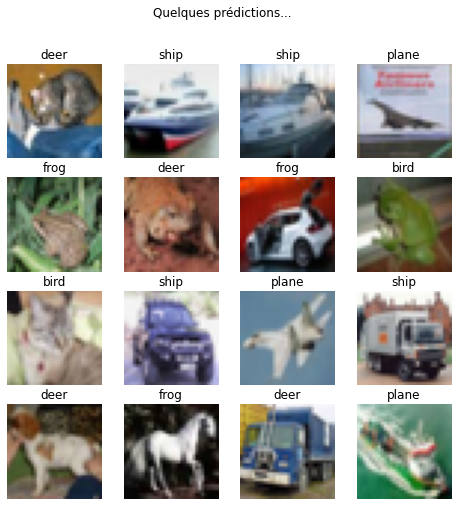

In [15]:
# On affiche une grille carrée d'images
nb_cols = 4
fig, axes = plt.subplots(nrows=nb_cols, ncols=nb_cols, figsize=(8, 8))
samples = x_test[:nb_cols ** 2]
predictions = neigh.predict(samples)

# On remet les exemples sous la forme d'images
samples = samples.reshape(samples.shape[0], 32, 32, 3)

for i, j in product(range(nb_cols), range(nb_cols)):
    axes[i, j].imshow(samples[i * nb_cols + j])
    axes[i, j].axis("off")
    axes[i, j].set_title(classes[predictions[i * nb_cols + j]])

fig.suptitle("Quelques prédictions...")
plt.show(fig)

La fonction score nous a permis de mesure la précision (accuracy) de l'algorithme KNN sur une partie de notre
jeu de données.
Nous avons obtenu 0.29 ce qui veut dire que sur les 100 images testées, seules 29% étaient correctes.
De plus, vous avez pu remarquer que le temps d'exécution était plutôt long. Imaginez le temps que cela mettrait si l'on voulait tester l'intégralité de notre jeu de test
qui avait 10 000 exemples....
Ici, nous avons testé pour k = 7. Mais quelle est la valeur optimale de $k$ ? $k$ est ce que l'on apelle un **hyperparamètre**. C'est une valeur à configurer avant l'entrainement de notre modèle sur le jeu de données.
A vous de la trouver...


Text(0, 0.5, 'Accuracy')

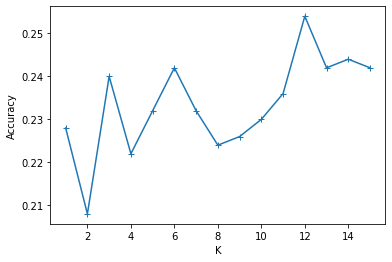

In [16]:
resultats = []
for k in range(1, 16):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train[:nb_imgs_train], y_train[:nb_imgs_train])
    # On mesure le score et on l'ajoute à une liste pour le sauvegarder
    resultats.append(neigh.score(x_test,y_test))

plt.plot(list(range(1, 16)), resultats, "-+")
plt.xlabel("K")
plt.ylabel("Accuracy")

La méthode K-MEAN (ou méthode des K-moyennes) est un algorithme de partionnement de données (*clustering* en anglais). C'est l'un des algorithmes les plus fondamentaux en apprentissage non supervisé. L'algorithme consiste  à partionner des données pour tenter d'en dégager des classes. Dans notre cas, appliqué aux images de CIFAR-10, cela  revient a classer les images tel que cela est déjà fait mais en utilisant juste les données brutes (c'est pour cela que l'on parle d'apprentissage *non supervisé*). L'idée générale derrière la méthode est de regrouper les données en fonction de leurs ressemblances, i.e. de leur distance. L'algorithme fonctionne ainsi: on commence en considérant K données aléatoires, elles sont chacunes représentantes d'une classe ; à chaque itération, on va partionner les données en fonction de la ressemblance avec les K images types de départ : on regroupe dans la classe K toutes les images étant plus proches de la K-ème image type ; on calcule ensuite la moyenne des classes obtenues et l'on remplace l'image type de chacune des classes obtenues par cette moyenne.

Ci-dessous nous avons tracé

In [ ]:
K_VALUE = 10

min_val = 1
# On initialise les K representants de chaque classe
K_mean = [255 * np.random.rand(32*32*3) for _ in range(10)]
# Valeur précédente de ces representants
K_save = [255 * np.random.rand(32*32*3) for _ in range(10)]

def nearest_K(image):
  """
  Retourne la classe K la plus proche de image
  """
  min_dist, min_k = float("+inf"), None
  for id_K, K_point in enumerate(K_mean):
    dist = np.linalg.norm(image - K_point)
    if dist < min_dist:
      min_dist, min_k = dist, id_K
  return min_k

def mean_point(k, tab):
  """
  Retourne barycentre des points (indicés) de tab
  """
  if tab != []:
    mean = 0
    for id in tab:
      mean += x_train[id] / len(tab)
    K_mean[k] = mean
    
def stop_convergence():
  """
  Evalue si l'on arrete les itérations
  """
  for k in range(10):
    if not(np.array_equal(K_mean[k], K_save[k])):
      return True
  return False

#KMEAN
iteration = 0
while stop_convergence():
  iteration += 1
  K_nearest = [[] for _ in range(10)]
  for id_image, image in enumerate(x_train):
    K_nearest[nearest_K(image)].append(id_image)
  for k in range(10):
    K_save[k] = K_mean[k]
    mean_point(k, K_nearest[k])
  print(iteration)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118


Essayons avec une fonction built-in écrite par de vrais Data Scientists:

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(x_train)

KMeans(n_clusters=10)

On ne peux pas évaluer automatiquement notre algorithme parce qu'il n'a pas conscience du type de classe auquels les images d'un même cluster appartienent
On va donc visualiser les cluster (chaque ligne = 1 cluster)

In [ ]:
predictions = kmeans.predict(x_test)

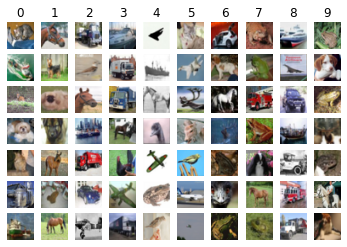

In [ ]:
# Grille de classification pour chaque cluster trouvé

n_clusters=10
imgs = [[] for _ in range(n_clusters)]
for cluster in range(n_clusters):
  i=0
  while len(imgs[cluster]) < 7 :
    if predictions[i] == cluster:
      imgs[cluster].append(i)
    i+= 1


for col, cluster in enumerate(imgs):
  for line, img in enumerate(cluster):
    plt_idx = line * n_clusters + col + 1
    plt.subplot(7, n_clusters, plt_idx)
    plt.imshow(x_test[img].reshape(32,32,3).astype('uint8'))
    plt.axis('off')
    if line == 0:
        plt.title(str(col))
plt.show()